In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud


In [2]:
# Loading the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Drop unnecessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Inspect the first few rows of the dataset
print(df.head())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


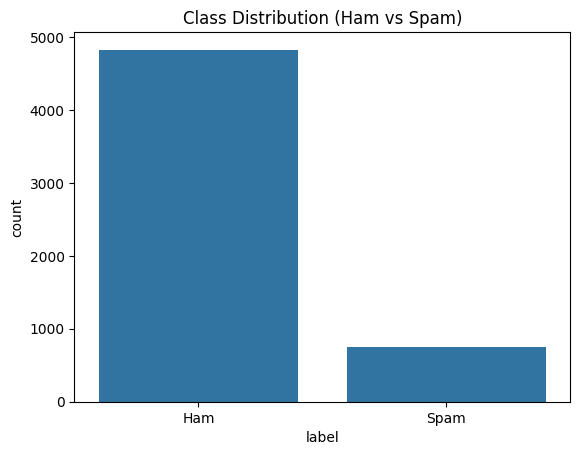

In [3]:
# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check for class imbalance
sns.countplot(x='label', data=df)
plt.title('Class Distribution (Ham vs Spam)')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()


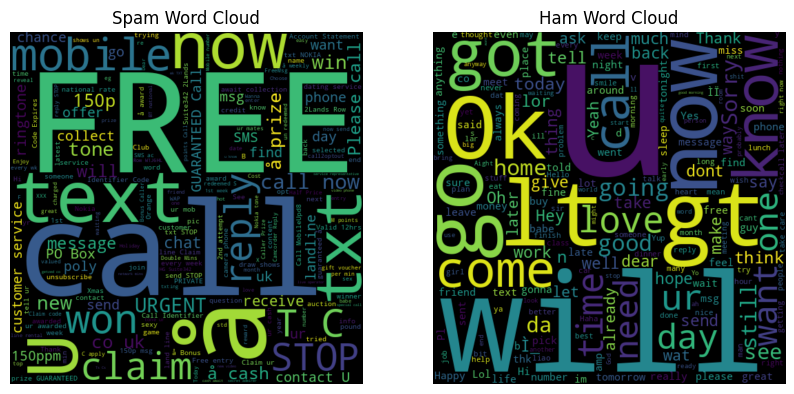

In [4]:
spam_words = ' '.join(list(df[df['label'] == 1]['text']))
ham_words = ' '.join(list(df[df['label'] == 0]['text']))

spam_wc = WordCloud(width=512, height=512).generate(spam_words)
ham_wc = WordCloud(width=512, height=512).generate(ham_words)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')
plt.show()


In [5]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['label']


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Training a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

AUC-ROC: 0.9840449050086355


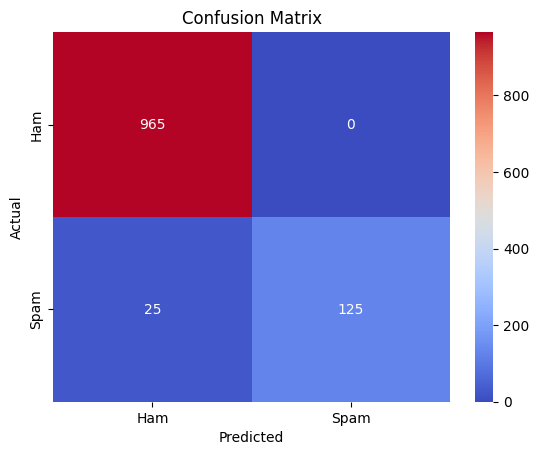

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


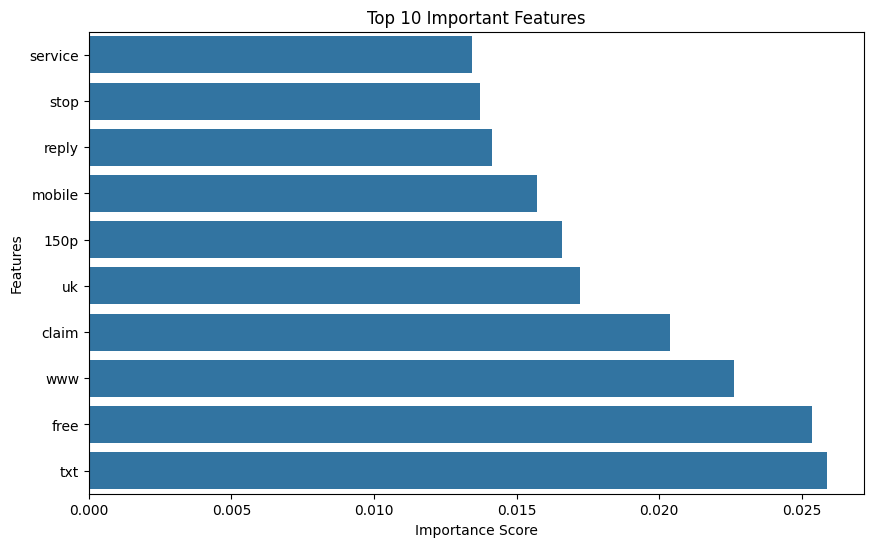

In [10]:
# Feature Importance (Top Words)
feature_importances = model.feature_importances_
indices = feature_importances.argsort()[-10:]  # Top 10 features
features = vectorizer.get_feature_names_out()[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=features)
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
